In [1]:
import os
import glob
import numpy             as np
import matplotlib.pyplot as plt
from datetime            import datetime
from scipy.interpolate   import make_interp_spline

In [7]:
a = np.array([1,2,3,4,5])
b = np.array([2,4,6,8,10])

c = np.array([a,b])

print(c)

[[ 1  2  3  4  5]
 [ 2  4  6  8 10]]


In [49]:
def plotfunc_smooth(X_VALUES, Y_VALUES, TITLE = '', X_LABEL = '', Y_LABEL = ''):
    #smoothed general function

    %matplotlib notebook
    
    plt.rc('font', size=14)
    
    from matplotlib import rcParams
    rcParams.update({'figure.autolayout': True})


    title = TITLE

    x_label = X_LABEL
    y_label = Y_LABEL

    x_values = X_VALUES
    y_values = Y_VALUES

    x_values = np.array(x_values)
    y_values = np.array(y_values)

    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    #plt.tight_layout()

    #Spline:
    X_Y_Spline = make_interp_spline(x_values, y_values)
    X_ = np.linspace(x_values.min(), x_values.max(), 500)
    Y_ = X_Y_Spline(X_)

    ax.plot(X_, Y_, color='k', linestyle='-')

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
    ax.set_xticks([])
    #ax.set_yticks([.4, .5, .6, .7, .8, .9, 1.0])
    
    #plt.savefig(TSIDstr + y_label + '_o_' + x_label)

    #plt.show()
    
    return(X_Y_Spline)

In [50]:
threshold = np.linspace(0.01, 60, 31)
slope = np.linspace(0.01, 10, 50)
gamma = np.linspace(0.01, 0.99, 100)
delta = 0.02

In [51]:
for fpath in glob.glob('vt*'):
    print(fpath, datetime.fromtimestamp(os.path.getmtime(fpath)).isoformat(' ', 'seconds'))

vt-2pod-master 2022-04-24 11:50:59


In [52]:
TSIDs = ['TS005']

In [53]:
TSIDstr = ""

for i in TSIDs:
    TSIDstr = TSIDstr + str(i) +'_'

In [54]:
file_paths = []

i=0
for ID in TSIDs:
    file_paths.append(os.path.join(glob.glob('vt*')[0], 'DATA', ID))
    i=i+1
    
print(file_paths)

['vt-2pod-master\\DATA\\TS005']


In [55]:
for p in file_paths:
    for file in os.listdir(p):
        if os.path.splitext(file)[1] == '.npy':
            if os.path.splitext(file)[0][14::][:-17] not in locals():
                locals()[os.path.splitext(file)[0][14::][:-17]] = []
            
            locals()[os.path.splitext(file)[0][14::][:-17]].append(np.load(os.path.join(p, file), allow_pickle=True))
        

In [56]:
#mean over postmean values

#spln = plotfunc_smooth(np.mean(stimRange, axis=0), np.mean(postmean, axis=0))

#ist murks!

In [57]:
meGuess = np.mean(eGuess)
meLapse = np.mean(eLapse)
meThreshold = np.mean(eThreshold)
meSlope = np.mean(eSlope)

mean_var_postmean = meGuess + (1 - meGuess - meLapse) * (1 - 2**((-(stimRange/meThreshold) ** meSlope)))

<IPython.core.display.Javascript object>


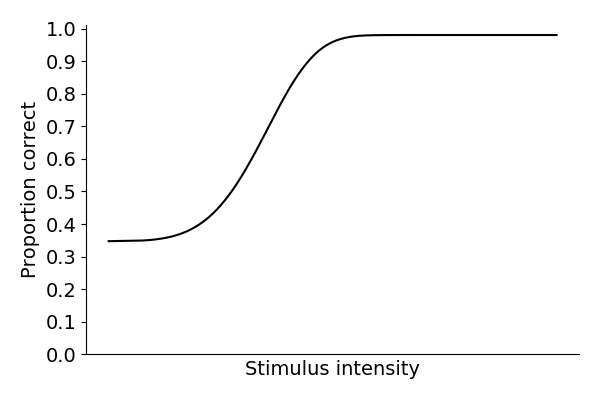

In [60]:
x_label = 'Stimulus intensity'
y_label = 'Proportion correct'

spln = plotfunc_smooth(stimRange[0], mean_var_postmean[0], X_LABEL=x_label, Y_LABEL=y_label)

#plt.axvline(16, color='#C0C0C0', linestyle='--')
#plt.axvline(31, color='#C0C0C0', linestyle='--')

#plt.axhline(0.75, color='#808080', linestyle='-.')



plt.savefig('BSP_Principles')
    
plt.show()

In [12]:
print(np.mean(eThreshold))
print(spln(np.mean(eThreshold)))

23.077630028292926
0.7163209489648366


In [13]:
#get 75% threshold from spln

abort = False
goal = 0.75
val = 20
step = 40
while abort == False:
    if spln(val) > goal: val = val - step
    else: val = val + step    
    if 1.00001 > spln(val)/goal > 0.99999 : abort = True
    step = step/2

thresh75 = round(val, 3)

print(thresh75)

24.024


<IPython.core.display.Javascript object>


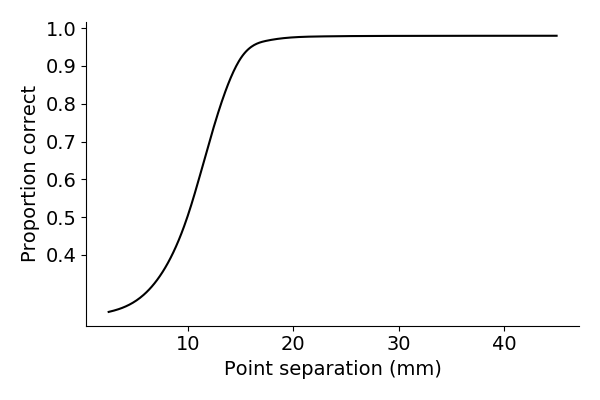

In [14]:
#Probability over Gamma 1TS

%matplotlib notebook

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.tight_layout()

X_Y_Spline = make_interp_spline(stimRange[0], postmean[0])
X_ = np.linspace(stimRange[0].min(), stimRange[0].max(), 500)
Y_ = X_Y_Spline(X_)

ax.plot(X_, Y_, color='k', linestyle='-')

#ax.plot(stimRange[0], mean_var_postmean[0], color='k', linestyle='-')

plt.xlabel('Point separation (mm)')
plt.ylabel('Proportion correct')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yticks([.4, .5, .6, .7, .8, .9, 1.0])

#plt.savefig()

plt.show()